In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [36]:
train_data = pd.read_csv('training_mush.csv')
test_data = pd.read_csv('testing_mush.csv')

In [37]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [24]:
X = train_data.drop('class_mush', axis=1)
y = train_data.class_mush

In [21]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_mush
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
test_data.rename(columns={'class': 'class_mush'}, inplace=True)

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
clf = RandomForestClassifier()
parameters = {'n_estimators':range(10,51,10), 
              'max_depth':range(1,13,2), 
              'min_samples_leaf':range(1,8),
             'min_samples_split':range(2,10,2)}

In [20]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv =5)

In [25]:
grid_search_cv_clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [27]:
best_clf = grid_search_cv_clf.best_estimator_

In [30]:
feature_importances = best_clf.feature_importances_

In [31]:
feature_importances_df = pd.DataFrame({'feature':list(X),
                                       'feature_importances':feature_importances})

In [35]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
8,gill-color,0.158040
4,odor,0.130443
10,stalk-root,0.107588
7,gill-size,0.089652
18,ring-type,0.080434
19,spore-print-color,0.071200
11,stalk-surface-above-ring,0.057286
12,stalk-surface-below-ring,0.054507
20,population,0.040927
6,gill-spacing,0.035818


In [48]:
y_pred = best_clf.predict(test_data)

In [49]:
y_pred.shape

(2031,)

In [50]:
sum(y_pred)

976

In [51]:
y_true = pd.read_csv('testing_y_mush.csv')

In [52]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)

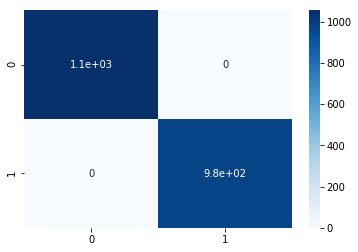

In [55]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues")